In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler

## Manipulation de dataset

In [2]:
def load_data(path:str):
    return pd.read_csv(f"data/{path}.csv")

In [109]:
data1 = load_data("Dataset1")

In [110]:
data1.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,1.8232,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,1.9092,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,1.6168,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1.4792,1


In [111]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          885 non-null    int64  
 1   P          885 non-null    object 
 2   K          885 non-null    int64  
 3   pH         885 non-null    float64
 4   EC         885 non-null    float64
 5   OC         884 non-null    float64
 6   S          885 non-null    float64
 7   Zn         885 non-null    float64
 8   Fe         885 non-null    float64
 9   Cu         884 non-null    float64
 10  Mn         885 non-null    float64
 11  B          885 non-null    float64
 12  OM         885 non-null    float64
 13  Fertility  885 non-null    int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 96.9+ KB


In [112]:
data1.isnull().sum()

N            0
P            0
K            0
pH           0
EC           0
OC           1
S            0
Zn           0
Fe           0
Cu           1
Mn           0
B            0
OM           0
Fertility    0
dtype: int64

- We don't have much of null values ,so we'll proceed by dropping them
- Also we notice that the column "P" has a dtype "object"

In [113]:
data1["P"].unique()

array(['8.6', '7.5', '9.6', '6.8', '9.9', '7.2', '7', '14.9', '8.1',
       '5.3', '8.3', '7.7', '?', '6.1', '9.4', '5.5', '5', '5.7', '7.9',
       '10.7', '5.9', '4.8', '6.4', '6.6', '4.4', '4.6', '9', '59.2',
       '14.5', '9.2', '78.9', '12.3', '11.2', '12.9', '11.4', '14.3',
       '10.5', '10.3', '12.7', '11.8', '14.7', '13.4', '3.9', '11',
       '11.6', '18.4', '20.4', '19.3', '18.2', '19.5', '20.8', '21.5',
       '21.1', '10.1', '8.8', '2.9', '15.6', '12.5', '13.8', '76.8',
       '103.1', '63.6', '61.4', '70.2', '68', '65.8', '74.6', '81.1',
       '98.7', '85.5', '72.4', '13.2', '12.1', '111.8', '125', '15.1',
       '118.4', '14', '13.6', '15.4', '16', '17.3', '94.3', '92.1',
       '89.9', '96.5', '122.8', '114', '107.5', '83.3', '87.7', '105.3',
       '120.6'], dtype=object)

In [114]:
data1["P"]=pd.to_numeric(data1["P"],errors="coerce")

In [115]:
data1.dropna(inplace=True)

In [116]:
data1.describe()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
count,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000
mean,246.986379,14.554484,501.290579,7.510874,0.544313,0.617753,7.528785,0.468978,4.133893,0.951260,8.671339,0.590079,1.062534,0.589103
std,77.372122,21.955891,129.064561,0.464042,0.141404,0.842548,4.402734,1.893104,3.109214,0.466121,4.299100,0.569059,1.449183,0.575302
min,6.000000,2.900000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.172000,0.000000
25%,201.000000,6.800000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.230000,0.270000,0.653600,0.000000
50%,257.000000,8.100000,475.000000,7.500000,0.550000,0.590000,6.640000,0.360000,3.560000,0.930000,8.350000,0.410000,1.014800,1.000000
75%,307.000000,10.700000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.480000,0.610000,1.341600,1.000000
max,383.000000,125.000000,1560.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,41.280000,2.000000


## Analyse des caractéristiques des attributs du dataset :

In [27]:
from math import ceil
def moustache(data,plots_per_row=3,outliers=True,figure_size=(15,10)):
    
    cols=len(data.columns)
    rows= ceil(cols/plots_per_row)
    
    
    
    # fig, axes = plt.subplots(nrows=1, ncols=len(data.columns), figsize=(15, 5))
    fig, axes = plt.subplots(nrows=rows, ncols=plots_per_row, figsize=figure_size)
    
    axes = axes.flatten()
    
    # Create boxplots for each column
    for i, col in enumerate(data.columns):
        if pd.api.types.is_numeric_dtype(data[col]):
          sns.boxplot(x=data[col], ax=axes[i],showfliers=outliers)
        
        # axes[i].set_title(col)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()
    

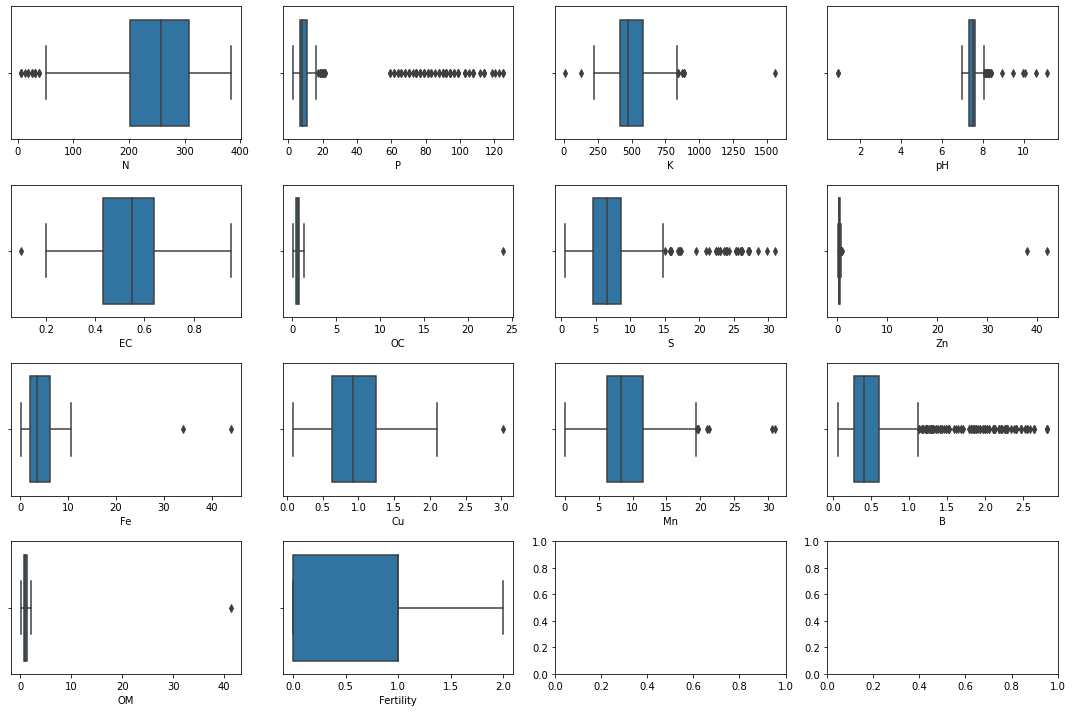

In [117]:
moustache(data1,4,outliers=True)

We can notice that boxplots are meaningful when it comes to continous data ,which is not the case for fertility since it has 3 unique values only. 

In [118]:
data1["Fertility"].unique()

array([0, 1, 2], dtype=int64)

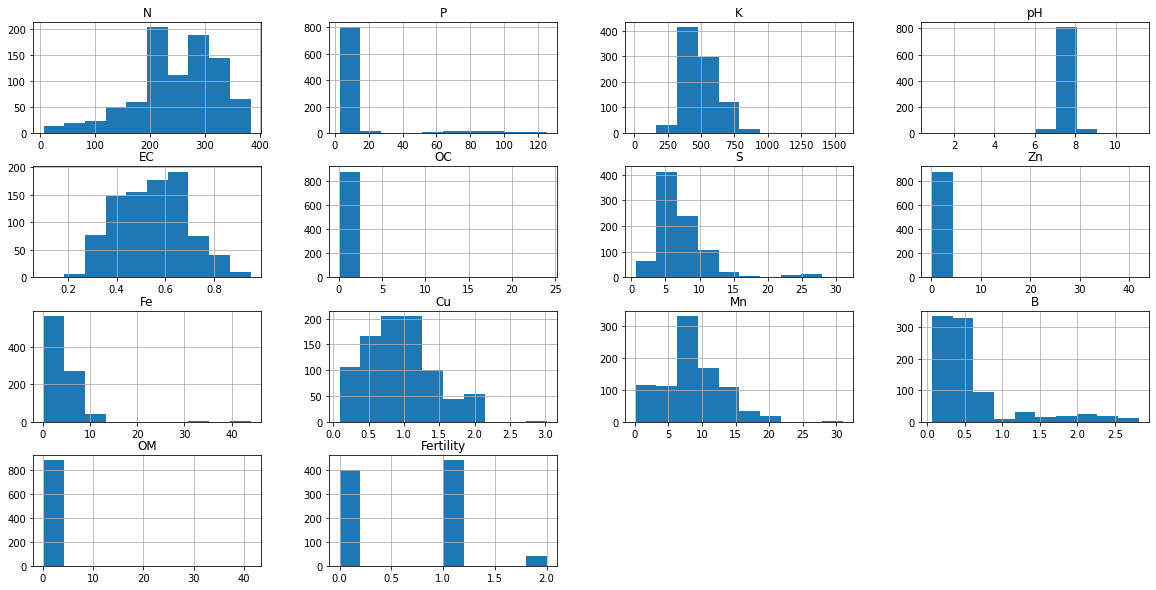

In [89]:
data1.hist(figsize=(20, 10))
plt.show()


Histograms guarentees that we see where how and where most of the data is distributed

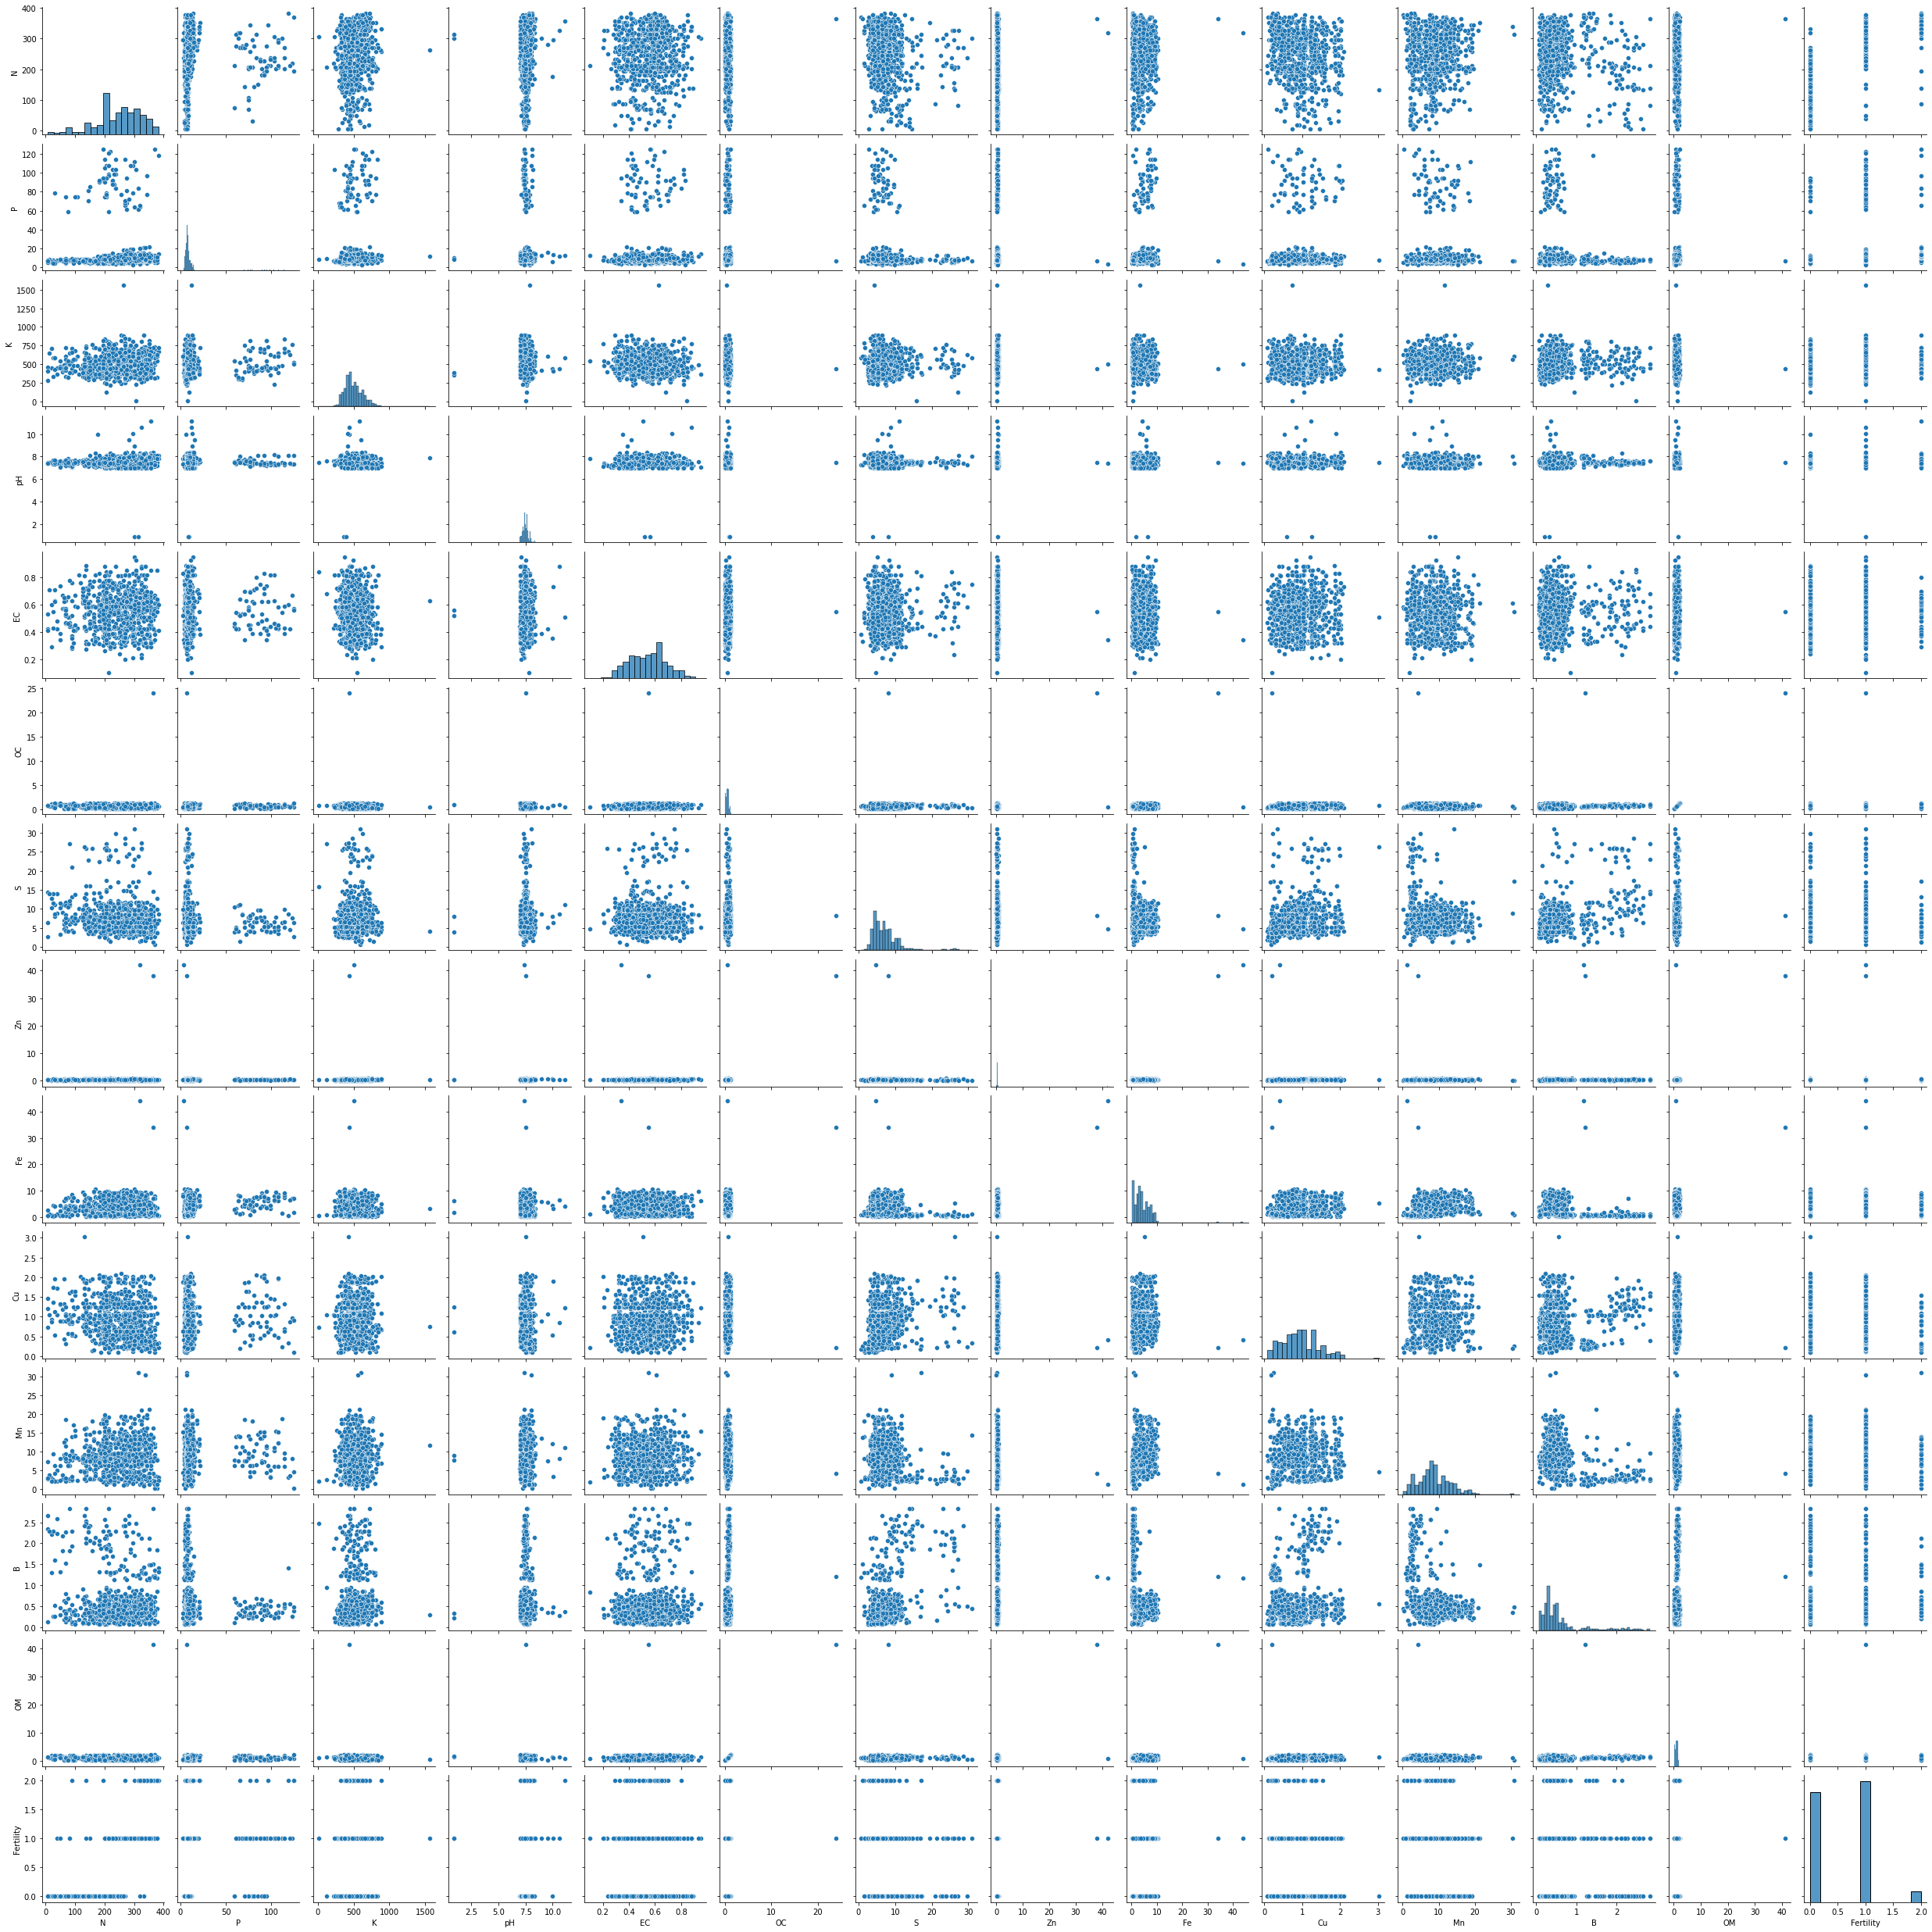

In [92]:
sns.pairplot(data1,markers=["x","o"])
plt.show()

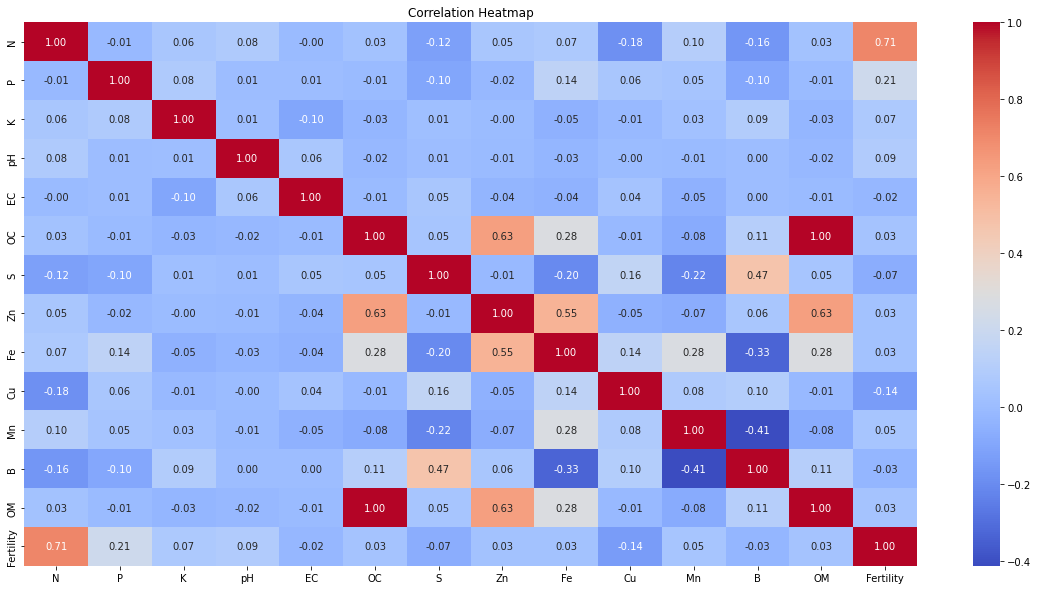

In [98]:

plt.figure(figsize=(20, 10))
sns.heatmap(data1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

plt.show()

- Il ya une forte correlation entre **OM** et **OC** (coef = 1.00) .
- On peut aussi dire que **Fertility** et **N** sont fortement corrélé (coef = 0.71) 

For the outliers , we replace all outliers with **NAN** and then we will drop null values
Or we replace with median

In [74]:
def process_outliers(data,rep_med=True):
    
    data_copy = data.copy(deep=True)
    
    if not rep_med:
        med = np.nan
    
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
           Q1 = data_copy[column].quantile(0.25)
           Q3 = data_copy[column].quantile(0.75)
           
           if rep_med:
              med = data_copy[column].median()
           
           IQR = Q3 - Q1
           
           max_threshold = Q3 + (IQR*1.5)
           min_threshold = Q1 - (IQR*1.5)
           
           # data_copy[column] = np.where(((data_copy[column]<= max_threshold)&(data_copy[column]>= min_threshold)),data_copy[column],np.nan)
           data_copy[column] = np.where(((data_copy[column]<= max_threshold)&(data_copy[column]>= min_threshold)),data_copy[column],med)
       
    return data_copy    

In [123]:
data1_no_outliers = process_outliers(data1)

In [124]:
data1_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 884
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          881 non-null    float64
 1   P          881 non-null    float64
 2   K          881 non-null    float64
 3   pH         881 non-null    float64
 4   EC         881 non-null    float64
 5   OC         881 non-null    float64
 6   S          881 non-null    float64
 7   Zn         881 non-null    float64
 8   Fe         881 non-null    float64
 9   Cu         881 non-null    float64
 10  Mn         881 non-null    float64
 11  B          881 non-null    float64
 12  OM         881 non-null    float64
 13  Fertility  881 non-null    float64
dtypes: float64(14)
memory usage: 103.2 KB


### Redondance verticales et horizontales

- forte correlation
- lignes dupliquées

In [126]:
data1_no_outliers.drop_duplicates(inplace=True)

In [127]:
data1_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 882
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          878 non-null    float64
 1   P          878 non-null    float64
 2   K          878 non-null    float64
 3   pH         878 non-null    float64
 4   EC         878 non-null    float64
 5   OC         878 non-null    float64
 6   S          878 non-null    float64
 7   Zn         878 non-null    float64
 8   Fe         878 non-null    float64
 9   Cu         878 non-null    float64
 10  Mn         878 non-null    float64
 11  B          878 non-null    float64
 12  OM         878 non-null    float64
 13  Fertility  878 non-null    float64
dtypes: float64(14)
memory usage: 102.9 KB


In [130]:
data1_no_outliers.drop(columns=["OM","Fertility"],inplace=True)

KeyError: "['OM' 'Fertility'] not found in axis"

In [129]:
data1_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 882
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       878 non-null    float64
 1   P       878 non-null    float64
 2   K       878 non-null    float64
 3   pH      878 non-null    float64
 4   EC      878 non-null    float64
 5   OC      878 non-null    float64
 6   S       878 non-null    float64
 7   Zn      878 non-null    float64
 8   Fe      878 non-null    float64
 9   Cu      878 non-null    float64
 10  Mn      878 non-null    float64
 11  B       878 non-null    float64
dtypes: float64(12)
memory usage: 89.2 KB


Normalization


In [6]:
def normalization(data,method="MinMax"):
    
    """
    data : Dataframe
    
    method : "MinMax" or "Zscore"
    
    return : normalized Dataframe
    """
    if method.lower() == "zscore": 
       scaler = StandardScaler()
    else: 
        scaler = MinMaxScaler()
    
    return pd.DataFrame(scaler.fit_transform(data),columns=data.columns)    
    

In [133]:
min_max = MinMaxScaler()
zscore = StandardScaler()

In [141]:
data1_no_outliers_minmax = pd.DataFrame(min_max.fit_transform(data1_no_outliers),columns=data1_no_outliers.columns)
data1_no_outliers_zscore = pd.DataFrame(zscore.fit_transform(data1_no_outliers),columns=data1_no_outliers.columns)

In [142]:
data1_no_outliers_minmax.describe()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B
count,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,0.638840,0.412170,0.590643,0.918722,0.522444,0.403808,0.395246,0.450891,0.183727,0.391983,0.398105,0.227104
std,0.205227,0.178456,0.146003,0.054207,0.166545,0.226276,0.190704,0.174548,0.265727,0.226833,0.222294,0.152560
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.517241,0.297710,0.487242,0.902098,0.388235,0.242718,0.240602,0.308824,0.000000,0.222222,0.261364,0.113636
50%,0.665782,0.396947,0.563791,0.923077,0.529412,0.339806,0.386466,0.426471,0.000000,0.350000,0.376705,0.193182
75%,0.798408,0.465649,0.689247,0.938462,0.635294,0.524272,0.522556,0.573529,0.394134,0.527778,0.547727,0.295455
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [144]:
desc =data1_no_outliers_zscore.describe()

In [145]:
desc

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B
count,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02
mean,3.237097e-17,-3.237097e-16,-1.699476e-16,5.098427e-16,2.791996e-16,2.427823e-17,-1.618548e-17,-8.902016e-17,1.618548e-16,3.358488e-16,1.456694e-16,-3.318024e-16
std,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00
min,-3.114625e+00,-2.310967e+00,-4.047726e+00,-1.695815e+01,-3.138743e+00,-1.785602e+00,-2.073746e+00,-2.584669e+00,-6.918041e-01,-1.729055e+00,-1.791914e+00,-1.489473e+00
25%,-5.928481e-01,-6.417593e-01,-7.086164e-01,-3.068512e-01,-8.063004e-01,-7.123242e-01,-8.113751e-01,-8.143819e-01,-6.918041e-01,-7.488227e-01,-6.154884e-01,-7.441846e-01
50%,1.313545e-01,-8.535667e-02,-1.840181e-01,8.038820e-02,4.186064e-02,-2.830130e-01,-4.606287e-02,-1.399869e-01,-6.918041e-01,-1.851891e-01,-9.632663e-02,-2.224829e-01
75%,7.779640e-01,2.998452e-01,6.757401e-01,3.643638e-01,6.779814e-01,5.326785e-01,6.679655e-01,7.030069e-01,7.922705e-01,5.989967e-01,6.734650e-01,4.482763e-01
max,1.760810e+00,3.295859e+00,2.805359e+00,1.500266e+00,2.869064e+00,2.636304e+00,3.172982e+00,3.147689e+00,3.073597e+00,2.681990e+00,2.709193e+00,5.069062e+00


In [152]:
desc.drop(index=["count"])


,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B
mean,3.237097e-17,-3.237097e-16,-1.699476e-16,5.098427e-16,2.791996e-16,2.427823e-17,-1.618548e-17,-8.902016e-17,1.618548e-16,3.358488e-16,1.456694e-16,-3.318024e-16
std,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00
min,-3.114625e+00,-2.310967e+00,-4.047726e+00,-1.695815e+01,-3.138743e+00,-1.785602e+00,-2.073746e+00,-2.584669e+00,-6.918041e-01,-1.729055e+00,-1.791914e+00,-1.489473e+00
25%,-5.928481e-01,-6.417593e-01,-7.086164e-01,-3.068512e-01,-8.063004e-01,-7.123242e-01,-8.113751e-01,-8.143819e-01,-6.918041e-01,-7.488227e-01,-6.154884e-01,-7.441846e-01
50%,1.313545e-01,-8.535667e-02,-1.840181e-01,8.038820e-02,4.186064e-02,-2.830130e-01,-4.606287e-02,-1.399869e-01,-6.918041e-01,-1.851891e-01,-9.632663e-02,-2.224829e-01
75%,7.779640e-01,2.998452e-01,6.757401e-01,3.643638e-01,6.779814e-01,5.326785e-01,6.679655e-01,7.030069e-01,7.922705e-01,5.989967e-01,6.734650e-01,4.482763e-01
max,1.760810e+00,3.295859e+00,2.805359e+00,1.500266e+00,2.869064e+00,2.636304e+00,3.172982e+00,3.147689e+00,3.073597e+00,2.681990e+00,2.709193e+00,5.069062e+00


# Dataset 2

In [7]:
data2 = load_data("Dataset2")

In [8]:
data2.head()

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,10/11/2020,10/31/2020,22.0,2543.0,23.0,2.6,304.7,0.9
1,95129,43,39741,5/30/2021,6/19/2021,NaN,3315.0,14.0,1.1,397.2,0.4
2,95129,40,39741,3/28/2021,4/17/2021,34.0,4816.0,37.0,4.1,577.1,0.8
3,95129,55,39741,2/6/2022,2/26/2022,110.0,10194.0,175.0,13.2,1221.5,1.7
4,95129,44,39741,6/20/2021,7/10/2021,14.0,3033.0,17.0,1.7,363.4,0.6


In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zcta             337 non-null    int64  
 1   time_period      337 non-null    int64  
 2   population       337 non-null    int64  
 3   Start date       337 non-null    object 
 4   end date         337 non-null    object 
 5   case count       311 non-null    float64
 6   test count       325 non-null    float64
 7   positive tests   310 non-null    float64
 8   case rate        337 non-null    float64
 9   test rate        337 non-null    float64
 10  positivity rate  337 non-null    float64
dtypes: float64(6), int64(3), object(2)
memory usage: 29.1+ KB


In [10]:
data2.describe()

,zcta,time_period,population,case count,test count,positive tests,case rate,test rate,positivity rate
count,337.000000,337.000000,337.000000,311.000000,325.000000,310.000000,337.000000,337.000000,337.000000
mean,94663.596439,43.694362,50260.548961,225.987138,4938.116923,380.196774,19.390504,454.838872,5.827596
std,506.650148,15.222508,17632.827769,401.756273,3672.164742,2027.547426,32.589093,311.005129,9.217758
min,94085.000000,18.000000,23223.000000,0.000000,11.000000,11.000000,0.000000,0.100000,0.000000
25%,94086.000000,31.000000,36975.000000,39.500000,2428.000000,47.250000,3.300000,249.700000,1.300000
50%,95035.000000,43.000000,50477.000000,91.000000,4352.000000,108.500000,8.100000,427.100000,3.000000
75%,95128.000000,56.000000,66256.000000,235.000000,6659.000000,282.000000,19.100000,614.900000,6.600000
max,95129.000000,155.000000,79655.000000,3627.000000,20177.000000,35000.000000,260.700000,1615.100000,100.000000


In [11]:
data2["zcta"].unique()

array([95129, 95128, 95127, 95035, 94087, 94086, 94085], dtype=int64)

In [12]:
data2["time_period"].unique()

array([ 32,  43,  40,  55,  44,  54,  25,  30,  31,  66,  48,  34,  33,
        38,  61,  62,  50,  65,  49,  27,  37,  24,  35,  23,  36,  22,
        21,  19,  42,  60,  39,  29,  41,  58,  45,  67,  52,  28,  47,
        46,  53,  56,  57,  26,  59,  64,  51,  63, 155,  18,  20],
      dtype=int64)

In [13]:
data2.isnull().sum()

zcta                0
time_period         0
population          0
Start date          0
end date            0
case count         26
test count         12
positive tests     27
case rate           0
test rate           0
positivity rate     0
dtype: int64

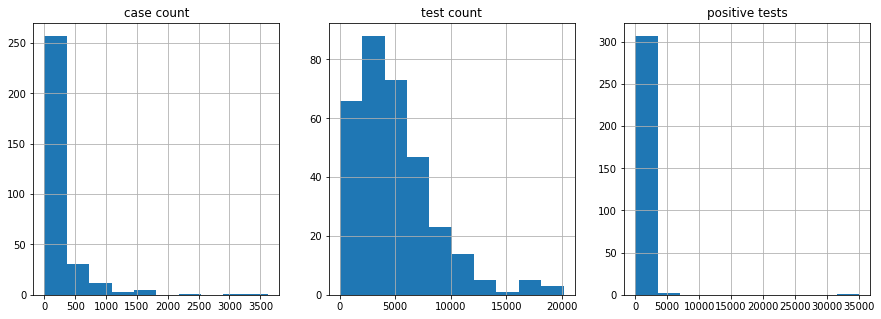

In [19]:

plt.figure(figsize=(15,5))

ax = plt.subplot(1,3,1)
data2["case count"].hist()
ax.set_title("case count")
ax = plt.subplot(1,3,2)
ax.set_title("test count")
data2["test count"].hist()
ax = plt.subplot(1,3,3)
ax.set_title("positive tests")
data2["positive tests"].hist()

plt.show()

We can see that we have null values in  columns ,also all of them have skewed distributions which means replacing with median or mean is not the best option.
Moreover,dropping more than 30 null values in a dataset of 300 values could lead to a loss of information.

We will try to leverage the use of **KNNs** to replace those values as follows:


In [21]:
from sklearn.impute import KNNImputer

data2_nonull = data2.copy(deep=True)

for col in ["positive tests","case count","test count"]:

# Assuming 'df' is your DataFrame and 'column' is the column with missing values
    imputer = KNNImputer(n_neighbors=3)
    data2_nonull[col] = imputer.fit_transform(data2_nonull[[col]])

In [23]:
data2_nonull.isnull().sum()

zcta               0
time_period        0
population         0
Start date         0
end date           0
case count         0
test count         0
positive tests     0
case rate          0
test rate          0
positivity rate    0
dtype: int64

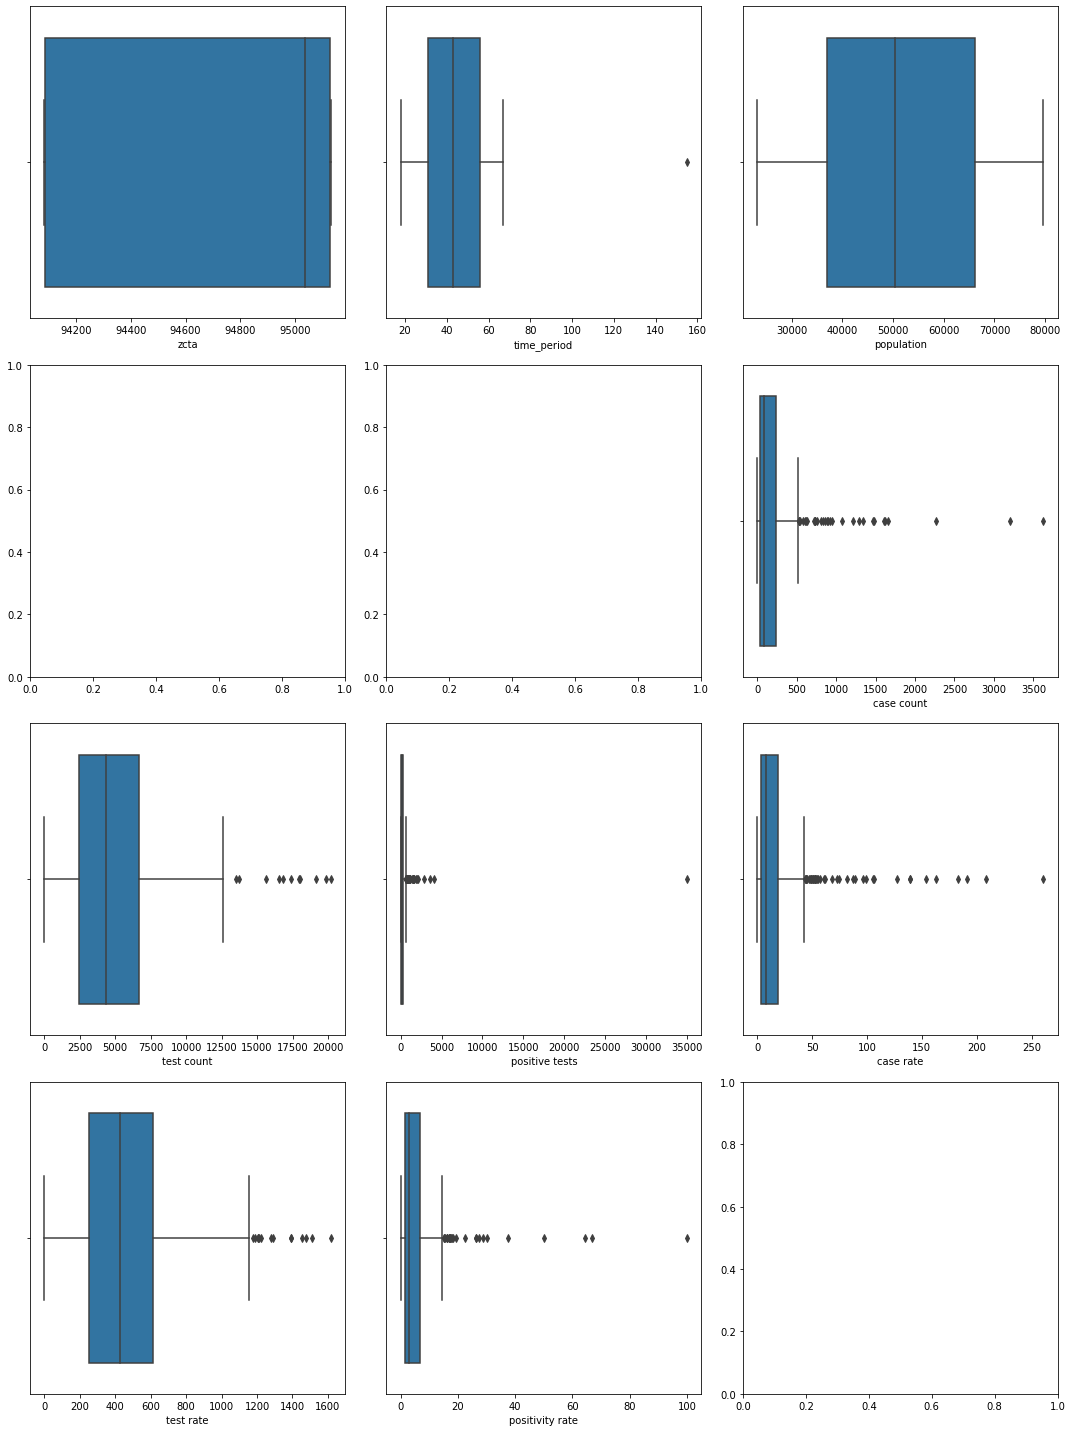

In [64]:
moustache(data2,figure_size=(15,20))

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

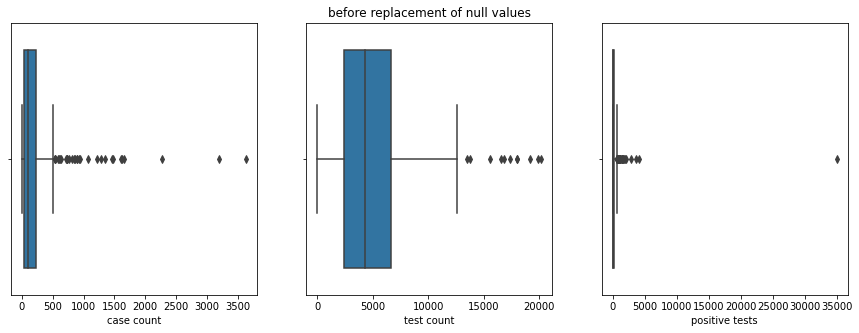

In [51]:

fig = plt.figure(figsize=(15,5))

# fig.title("before replacement of null values")

ax = plt.subplot(1,3,1)
sns.boxplot(x=data2["case count"])
# ax.set_title("case count")
ax = plt.subplot(1,3,2)
plt.title("before replacement of null values")
# ax.set_title("test count")
sns.boxplot(x=data2["test count"])
ax = plt.subplot(1,3,3)
# ax.set_title("positive tests")
sns.boxplot(x=data2["positive tests"])

plt.show()

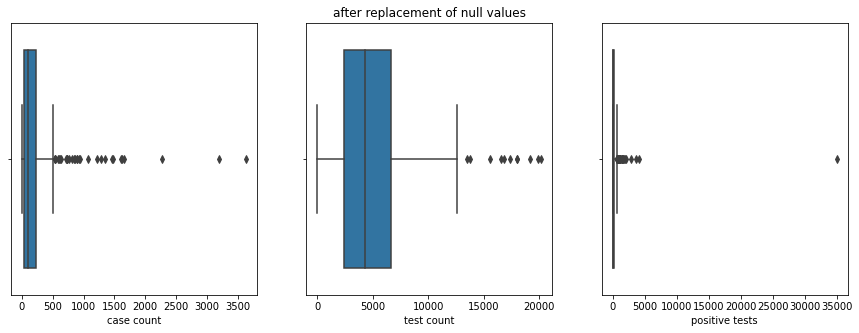

In [53]:
fig = plt.figure(figsize=(15,5))

# fig.title("before replacement of null values")

ax = plt.subplot(1,3,1)
sns.boxplot(x=data2["case count"])
# ax.set_title("case count")
ax = plt.subplot(1,3,2)
plt.title("after replacement of null values")
# ax.set_title("test count")
sns.boxplot(x=data2["test count"])
ax = plt.subplot(1,3,3)
# ax.set_title("positive tests")
sns.boxplot(x=data2["positive tests"])

plt.show()

In [67]:
numeric_columns = data2_nonull.select_dtypes(include=['float64', 'int64']).columns

# Exclude date columns from normalization
date_columns = ['Start date', 'end date']  # Replace with your actual date column names
numeric_columns = [col for col in numeric_columns if col not in date_columns]


# Create a new DataFrame with only the numeric columns
data2_nonull_numeric = data2_nonull[numeric_columns]

# Normalize the numeric columns

data2_normalized = normalization(data2_nonull_numeric,method="zscore")

# Combine the normalized numeric columns with the date columns

data2_normalized = pd.concat([data2_nonull[date_columns], data2_normalized], axis=1)


In [68]:
data2_normalized

,Start date,end date,zcta,time_period,population,case count,test count,positive tests,case rate,test rate,positivity rate
0,10/11/2020,10/31/2020,0.919956,-0.769371,-0.597476,-0.529388,-0.665192,-0.183981,-0.515985,-0.483472,-0.535371
1,5/30/2021,6/19/2021,0.919956,-0.045682,-0.597476,0.000000,-0.450786,-0.188616,-0.562081,-0.185607,-0.589695
2,3/28/2021,4/17/2021,0.919956,-0.243052,-0.597476,-0.498246,-0.033915,-0.176770,-0.469889,0.393701,-0.546236
3,2/6/2022,2/26/2022,0.919956,0.743797,-0.597476,-0.301010,1.459708,-0.105690,-0.190239,2.468773,-0.448453
4,6/20/2021,7/10/2021,0.919956,0.020108,-0.597476,-0.550150,-0.529105,-0.187071,-0.543642,-0.294448,-0.567966
...,...,...,...,...,...,...,...,...,...,...,...
332,1-May,21-May,-1.143702,1.006956,-1.535644,-0.158274,-0.728514,-0.096934,0.442814,0.063956,0.268621
333,24-Jul,13-Aug,-1.143702,1.270116,-1.535644,-0.197202,-0.997077,-0.097964,0.350622,-0.574602,0.898777
334,12-Jun,2-Jul,-1.143702,1.138536,-1.535644,-0.018133,-0.900428,-0.064485,0.783926,-0.344683,0.996559
335,28-Jun,18-Jul,-1.143702,-1.098320,-1.535644,-0.448937,-0.988468,-0.164408,-0.260919,-0.553993,-0.155105


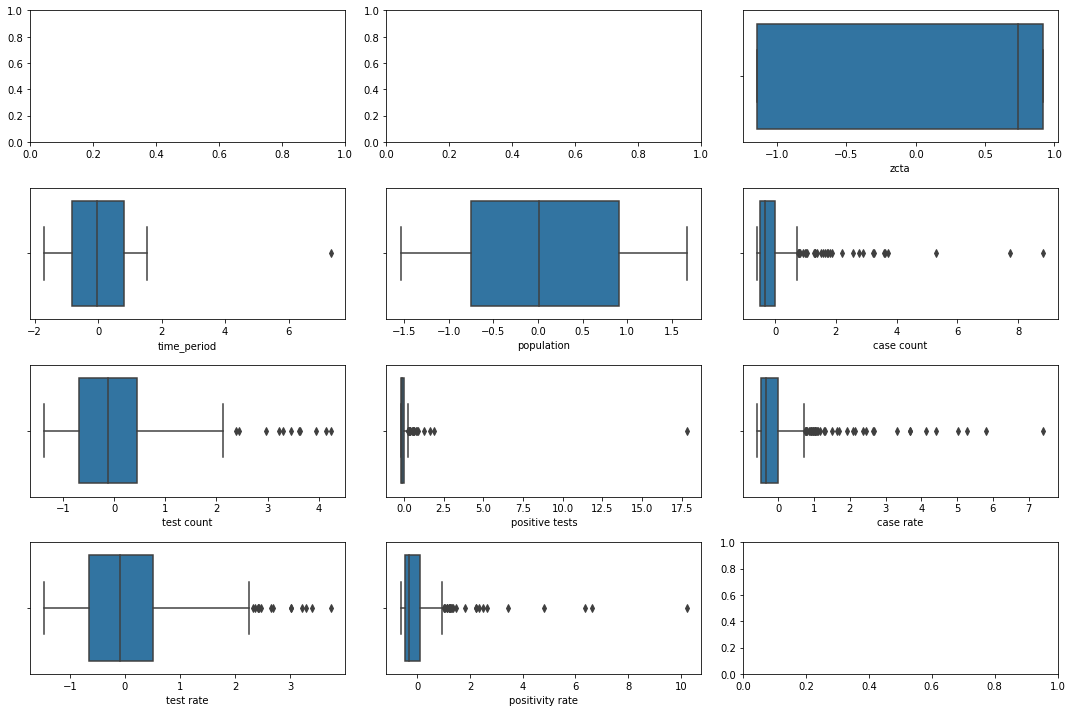

In [69]:
moustache(data2_normalized)

In [96]:
data2_processed = process_outliers(data2_nonull,rep_med=True)
# data2_processed = process_outliers(data2_processed,rep_med=True)
# data2_processed = process_outliers(data2_normalized,rep_med=True)

In [84]:
data2_processed.isna().sum()

Start date         0
end date           0
zcta               0
time_period        0
population         0
case count         0
test count         0
positive tests     0
case rate          0
test rate          0
positivity rate    0
dtype: int64

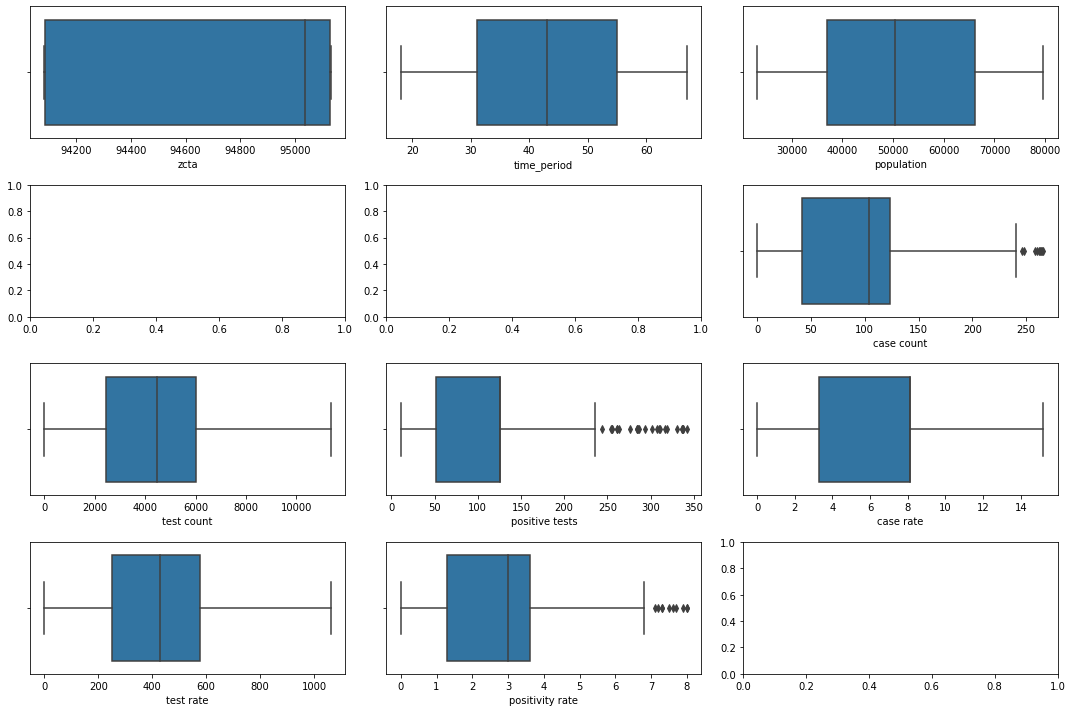

In [95]:
moustache(data2_processed,outliers=True)

In [59]:
data2_nonull.describe()
# data2_processed.describe()

,zcta,time_period,population,case count,test count,positive tests,case rate,test rate,positivity rate
count,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000
mean,94663.596439,43.694362,50260.548961,225.987138,4938.116923,380.196774,19.390504,454.838872,5.827596
std,506.650148,15.222508,17632.827769,385.899197,3605.994192,1944.377660,32.589093,311.005129,9.217758
min,94085.000000,18.000000,23223.000000,0.000000,11.000000,11.000000,0.000000,0.100000,0.000000
25%,94086.000000,31.000000,36975.000000,42.000000,2438.000000,52.000000,3.300000,249.700000,1.300000
50%,95035.000000,43.000000,50477.000000,104.000000,4474.000000,126.000000,8.100000,427.100000,3.000000
75%,95128.000000,56.000000,66256.000000,225.987138,6561.000000,380.196774,19.100000,614.900000,6.600000
max,95129.000000,155.000000,79655.000000,3627.000000,20177.000000,35000.000000,260.700000,1615.100000,100.000000


## More visualization

La distribution du nombre t otal des cas confirmés et tests positi f s par zones ( I ndication
Tree Map /Bar chart

In [105]:
import plotly.express as px

# Assuming 'df' is your DataFrame with columns 'zone', 'total_cases', and 'positive_tests'
# fig = px.treemap(data2_processed, path=['zcta'], values='case count', title='Total Cases by Zone')

fig = px.treemap(data2_processed, path=['zcta'], values='case count', color='positive tests',
                 color_continuous_scale='viridis', title='Total and Positive Cases by Zone',
                 hover_data={'case count': ':,.0f', 'positive tests': ':,.0f','zcta':':,.0f'})


fig.show()


Comment les tests COVID 19, les tests positifs et le nombre de cas évolue au fil du temps
(hebdomadaire, mensuel et pour une zone choisit Indication : Line

In [106]:
data2_processed["Start date"].unique()

array(['10/11/2020', '5/30/2021', '3/28/2021', '2/6/2022', '6/20/2021',
       '1/16/2022', '5/17/2020', '8/30/2020', '9/20/2020', '9/25/2022',
       '9/12/2021', '11/22/2020', '11/1/2020', '2/14/2021', '6/12/2022',
       '7/3/2022', '10/24/2021', '9/4/2022', '10/3/2021', '6/28/2020',
       '1/24/2021', '4/26/2020', '12/13/2020', '4/5/2020', '1/3/2021',
       '3/15/2020', '2/23/2020', '1/12/2020', '5/9/2021', '5/22/2022',
       '3/7/2021', '8/9/2020', '4/18/2021', '4/10/2022', '7/11/2021',
       '10/16/2022', '12/5/2021', '7/19/2020', '8/22/2021', '8/1/2021',
       '12/26/2021', '2/27/2022', '3/20/2022', '6/7/2020', '5/1/2022',
       '8/14/2022', '11/14/2021', '7/24/2022', '12/22/2019', '5-Apr',
       '22-Nov', '11-Oct', '1-Nov', '9-Aug', '26-Apr', '24-Jul', '14-Nov',
       '28-Mar', '12-Jun', '19-Jul', '7-Mar', '4-Sep', '10-Apr', '30-Aug',
       '28-Jun', '17-May', '16-Oct', '15-Mar', '23-Feb', '2-Feb',
       '20-Jun', '20-Sep', '25-Sep', '14-Feb', '1-May', '3-Jul', '7-Jun

In [176]:
data2_copy = data2_processed.copy(deep=True)

In [111]:
data2_copy["Start date"] = pd.to_datetime(data2_copy["Start date"], errors='coerce', infer_datetime_format=True)

In [112]:
data2_copy["Start date"].unique()

array([                          'NaT', '1900-04-05T00:00:00.000000000',
       '1900-11-22T00:00:00.000000000', '1900-10-11T00:00:00.000000000',
       '1900-11-01T00:00:00.000000000', '1900-08-09T00:00:00.000000000',
       '1900-04-26T00:00:00.000000000', '1900-07-24T00:00:00.000000000',
       '1900-11-14T00:00:00.000000000', '1900-03-28T00:00:00.000000000',
       '1900-06-12T00:00:00.000000000', '1900-07-19T00:00:00.000000000',
       '1900-03-07T00:00:00.000000000', '1900-09-04T00:00:00.000000000',
       '1900-04-10T00:00:00.000000000', '1900-08-30T00:00:00.000000000',
       '1900-06-28T00:00:00.000000000', '1900-05-17T00:00:00.000000000',
       '1900-10-16T00:00:00.000000000', '1900-03-15T00:00:00.000000000',
       '1900-02-23T00:00:00.000000000', '1900-02-02T00:00:00.000000000',
       '1900-06-20T00:00:00.000000000', '1900-09-20T00:00:00.000000000',
       '1900-09-25T00:00:00.000000000', '1900-02-14T00:00:00.000000000',
       '1900-05-01T00:00:00.000000000', '1900-07-03

Comment peut on efficacement graphiquement représenter le rapport entre la population
et le nombre de tests effectués ?

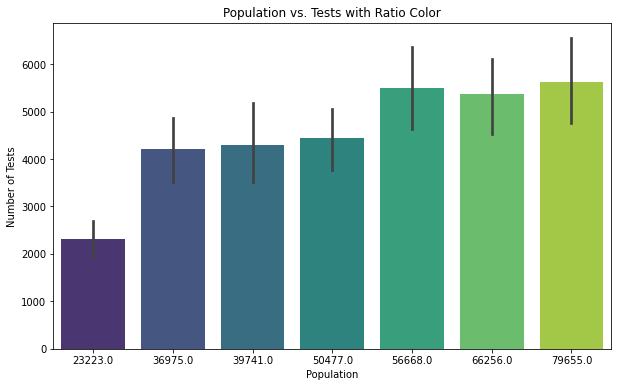

In [128]:


# Suppose 'df' is your DataFrame with columns 'population' and 'tests'
# Add a new column for the ratio
# data2_copy['test_population_ratio'] = data2_copy['test count'] / data2_copy['population']

# Scatter plot
plt.figure(figsize=(10, 6))
# sns.scatterplot(x='population', y='test count', data=data2_copy, hue='test_population_ratio', palette='viridis', size='test_population_ratio', sizes=(20, 200))
sns.barplot(x='population', y='test count', data=data2_copy ,palette='viridis')
plt.title('Population vs. Tests with Ratio Color')
plt.xlabel('Population')
plt.ylabel('Number of Tests')
plt.show()


In [120]:
# data2_copy.drop(labels=["test_population_ratio"],axis=1,inplace=True)

Quelles sont les 5 zones les plus fortement impactées par le coronavirus ?

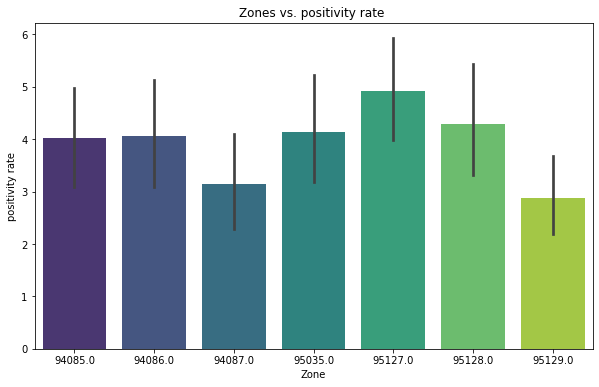

In [138]:
plt.figure(figsize=(10, 6))
# sns.scatterplot(x='population', y='test count', data=data2_copy, hue='test_population_ratio', palette='viridis', size='test_population_ratio', sizes=(20, 200))
# sns.barplot(x='zcta', y='positive tests', data=data2_copy ,palette='viridis')
sns.barplot(x='zcta', y='positivity rate', data=data2_copy ,palette='viridis')
plt.title('Zones vs. positivity rate ')
plt.xlabel('Zone')
plt.ylabel('positivity rate')
plt.show()

Quel est le rapport entre les cas confirmés, les tests effectués et les tests positifs au fil du
temps pour chaque zone ? ( La période doit être choisie)

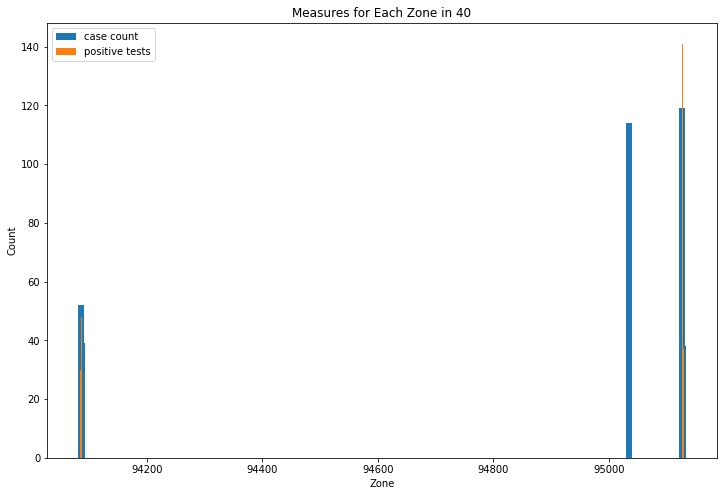

In [178]:




# Choose a specific time period
selected_period = '40'  # Replace with the actual value you want to focus on

# Filter DataFrame for the selected period

df_selected_period = data2_copy[data2_copy['time_period'] == int(selected_period)]



plt.figure(figsize=(12, 8))
# ax = plt.subplot(111)
# sns.barplot(x='zcta', y='case_count', data=df_selected_period, color='blue', label='Total Cases',ax=ax)
# sns.barplot(x='zcta', y='test_count', data=df_selected_period, color='orange', label='Tests',ax=ax)
# sns.barplot(x='zcta', y='positive_tests', data=df_selected_period, color='green', label='Positive Tests',ax=ax)

# plt.plot(df_selected_period["zcta"],df_selected_period["case count"])
plt.bar(df_selected_period["zcta"],df_selected_period["case count"],width=10)
# plt.plot(df_selected_period["zcta"],df_selected_period["test count"])
# plt.plot(df_selected_period["zcta"],df_selected_period["positive tests"])
plt.bar(df_selected_period["zcta"],df_selected_period["positive tests"])

# plt.legend(["case count","test count","positive tests"])
plt.legend(["case count","positive tests"])

plt.title(f'Measures for Each Zone in {selected_period}')
plt.xlabel('Zone')
plt.ylabel('Count')
plt.show()



In [165]:
data2_copy[data2_copy['time_period'] == int(selected_period)]

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
2,95129.0,40.0,39741.0,NaT,4/17/2021,34.0,4816.0,37.0,4.1,577.1,0.8
52,95128.0,40.0,36975.0,NaT,4/17/2021,38.0,5391.0,47.0,4.9,694.3,0.9
132,95127.0,40.0,66256.0,NaT,4/17/2021,119.0,6125.0,141.0,8.6,440.2,2.3
173,95035.0,40.0,79655.0,NaT,4/17/2021,114.0,7992.0,129.0,6.8,477.8,1.6
199,94087.0,40.0,56668.0,1900-03-28,17-Apr,39.0,6726.0,48.0,3.3,565.2,0.7
249,94086.0,40.0,50477.0,1900-03-28,17-Apr,52.0,5655.0,63.0,4.9,533.5,1.1
316,94085.0,40.0,23223.0,1900-03-28,17-Apr,28.0,2817.0,30.0,5.7,577.6,1.1
